In [1]:
%pylab inline
import scipy.integrate as integrate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [3]:
# solve_ivp functions

# returns vector of dx/dt, dAcx/dt and dAx/dt in that order

def derivs(t, y, nu, xs,K,koff,a0):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Ac = y[1:N+1]          # bound complex on lattice
    As = y[-N:]             # unbound complex on lattice
    
    dxdt = integrate.trapz(-(x0-xs)*Ac, x=xs)
    binding = exp(-0.5*(x0-xs)**2)*As 
    burnt = nu*Ac
    rebinding = koff/(1+K)*a0-koff*As

    dAcdt = (binding - burnt)
    dAsdt = -binding +rebinding
    
    return array( [dxdt] + list(dAcdt) + list(dAsdt))

In [4]:
# define event as having gone to x = 20.0
def event(t, y):
    x0 = y[0]
        
    return 95.0-x0

event.direction = 0        
event.terminal = True     # stop solver if event satisfied

In [17]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

tf = 150.0

a0s = ones(1)*1.0
a0s = logspace(-1,2,20,base = 10)
a0_n = len(a0s)
nus = array([0.001,0.01, 0.1,1,10])
nu_n = len(nus)

dG = 15

K = 0.01
koff = K

# define domain and lattice
Lmax = 100.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)


In [7]:

#I.C.

vs = []  # record final speed and burn rate
burnt = []
ts = []
wakes = []

nu = 1.0
for a0 in a0s:
    print(a0)
    
    x0 = 0.0
    Acx = zeros(Nx)

    astdy = a0/(1+koff)
    A0x = linspace(astdy,-astdy, Nx)
    A0x[xs>=0.0] = astdy

    y0 = array([x0] + list(Acx) + list(A0x))

    sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,K,koff,a0), (0., tf), y0, events=[event], method='BDF')

    btmp = []
    vtmp = []
    for t in range(len(sol.t)):
        speed = derivs(sol.t[t], sol.y[:,t], nu, xs,K,koff,a0)[0]
        vtmp.append(speed)
        Acxf = sol.y[1:1+Nx,t]
        btot = integrate.trapz(nu*Acxf, x=xs)
        btmp.append(btot)

    vs.append(vtmp)
    burnt.append(btmp)
    ts.append(sol.t)
    wakes.append(min(sol.y[-Nx:,-1]))


0.1
0.14384498882876628
0.20691380811147897
0.29763514416313175
0.42813323987193935
0.6158482110660264
0.8858667904100825
1.2742749857031335
1.8329807108324356
2.636650898730358
3.79269019073225
5.455594781168517
7.847599703514611
11.288378916846883
16.23776739188721
23.357214690901213
33.59818286283781
48.32930238571752
69.51927961775606
100.0


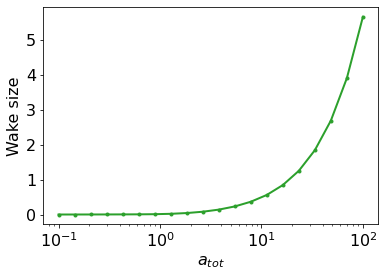

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

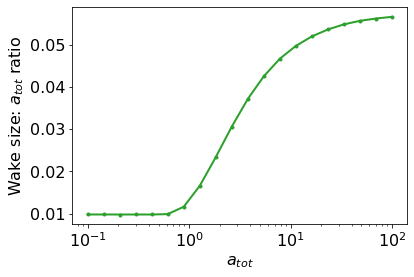

In [10]:
plot(a0s,wakes,".-", linewidth = 2.0, c = "tab:green")
xscale("log")
ylabel("Wake size", fontsize = 16)
xlabel("$a_{tot}$", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
show()

plot(a0s,wakes/a0s,".-", linewidth = 2.0, c = "tab:green")
xscale("log")
ylabel("Wake size: $a_{tot}$ ratio", fontsize = 16)
xlabel("$a_{tot}$", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)

In [25]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

tf = 70.0

a0s = ones(1)*1.0
a0s = logspace(-1,2,20,base = 10)
a0_n = len(a0s)
nus = array([0.001,0.01, 0.1,1,10])
nu_n = len(nus)

dG = 15

K = 0.01
koff = K

# define domain and lattice
Lmax = 30.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)


In [28]:

#I.C.

vs = []  # record final speed and burn rate
burnt = []
ts = []
wakes = []

a0 = 1.0
for nu in nus:
    print(nu)
    
    x0 = 0.0
    Acx = zeros(Nx)

    astdy = a0/(1+koff)
    A0x = linspace(astdy,-4*astdy, Nx)
    A0x[xs>=0.0] = astdy

    y0 = array([x0] + list(Acx) + list(A0x))

    sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,K,koff,a0), (0., tf), y0, events=[event], method='BDF')

    btmp = []
    vtmp = []
    for t in range(len(sol.t)):
        speed = derivs(sol.t[t], sol.y[:,t], nu, xs,K,koff,a0)[0]
        vtmp.append(speed)
        Acxf = sol.y[1:1+Nx,t]
        btot = integrate.trapz(nu*Acxf, x=xs)
        btmp.append(btot)

    vs.append(vtmp)
    burnt.append(btmp)
    ts.append(sol.t)
    wakes.append(min(sol.y[-Nx:,-1]))


0.001
0.01
0.1
1.0
10.0


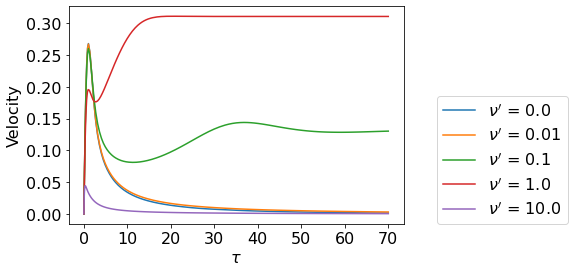

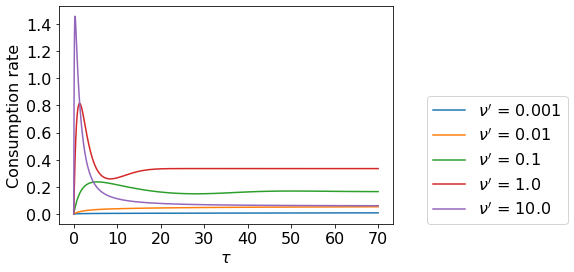

In [29]:

for i in range(nu_n):
    plot(ts[i],vs[i], label = r"$\nu'$ = "+ str(round(nus[i],2)))
ylabel("Velocity", fontsize = 16)
xlabel(r"$\tau$", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
legend(loc = (1.1,0.0),fontsize = 16)
show()

for i in range(nu_n):
    plot(ts[i],burnt[i], label = r"$\nu'$ = "+ str(round(nus[i],3)))
legend(loc = (0,-1),fontsize = 16, ncol = 2)
xlabel(r"$\tau$", fontsize = 16)
ylabel("Consumption rate", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
legend(loc = (1.1,0.0),fontsize = 16)
show()


